# Training Classifier

<li>https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html</li>

# Classifier 2D Binaire tiktok sur un Resnet
<p> Le code utilisé est celui de notre précédent classifier qui a été modifié </p>

## Loader

### Gestion de l'accès au drive / import des bibliothèques / Gestion de l'accès au GPU

In [1]:
########## Accès au drive ########
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
########## Positionnement dans le repertoire ########
%cd /content/drive/MyDrive/TSP/HTI/PFE
#%cd /content/drive/MyDrive/PFE
!ls

/content/drive/MyDrive/TSP/HTI/PFE
API				Loader_2D_C.py		    resnet180.01vidmizer.pth
API-Database			__pycache__		    resnet180.1vidmizer.pth
Classifier_2D_c_tiktok.ipynb	resnet180.0001.pth	    test_tiktok
Classifier_2D_c_vidmizer.ipynb	resnet180.0001vidmizer.pth  test_vidmizer
Classifier_2D_c_youtube.ipynb	resnet180.001.pth	    train_tiktok
Database_2D			resnet180.001vidmizer.pth   train_vidmizer


In [3]:
###### Librairies #######
import os
import pandas as pd
from torchvision.io import read_image
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
#########################

In [4]:
########## Gestion du GPU ###########
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # see if gpu is available
print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: True 


### Fonctions de Customisation de Dataset et de Loader

In [5]:
########### Importation de la Classe Customisée ######
import sys
sys.path.append('Loader_2D_C.py')
print(sys.path)
from Loader_2D_C import CustomImageDataset

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', 'Loader_2D_C.py']


In [6]:
################# Modification selon la classe  du RESNET #########@

########## Path ##########
dataset_2D = './train_tiktok'
dataset_test_2D = './test_tiktok'
annotation_test = dataset_test_2D + '/label_test_tiktok.txt'
annotation = dataset_2D + '/label_train_tiktok.txt'

Calcul de la mean et de la vairiance du dataset

In [7]:
# Initialiser des variables pour accumuler les sommes et les sommes des carrés
sum_of_pixels = 0
sum_of_squares = 0
num_of_pixels = 0

# Parcourir le répertoire et charger chaque fichier .npy
for filename in os.listdir(dataset_2D):
    if filename.endswith('.npy'):
        filepath = os.path.join(dataset_2D, filename)
        data = np.load(filepath)  # Charger le fichier .npy

        # Accumuler les valeurs
        sum_of_pixels += np.sum(data)
        sum_of_squares += np.sum(data ** 2)
        num_of_pixels += data.size
        print(filepath)

# Calcul de la moyenne et de l'écart-type
mean = sum_of_pixels / num_of_pixels
std = np.sqrt((sum_of_squares / num_of_pixels) - (mean ** 2))
print()
print(f'Mean: {mean:.3f}, Std: {std:.3f}')

./train_tiktok/tiktok_1_4.npy
./train_tiktok/tiktok_1_1.npy
./train_tiktok/tiktok_1_3.npy
./train_tiktok/tiktok_0_1.npy
./train_tiktok/tiktok_1_2.npy
./train_tiktok/tiktok_6_1.npy
./train_tiktok/tiktok_2_3.npy
./train_tiktok/tiktok_6_6.npy
./train_tiktok/tiktok_3_2.npy
./train_tiktok/tiktok_5_0.npy
./train_tiktok/tiktok_3_0.npy
./train_tiktok/tiktok_4_3.npy
./train_tiktok/tiktok_7_0.npy
./train_tiktok/tiktok_2_7.npy
./train_tiktok/tiktok_2_0.npy
./train_tiktok/tiktok_7_3.npy
./train_tiktok/tiktok_4_9.npy
./train_tiktok/tiktok_0_0.npy
./train_tiktok/tiktok_6_0.npy
./train_tiktok/tiktok_2_4.npy
./train_tiktok/tiktok_2_6.npy
./train_tiktok/tiktok_6_2.npy
./train_tiktok/tiktok_1_0.npy
./train_tiktok/tiktok_5_4.npy
./train_tiktok/tiktok_7_1.npy
./train_tiktok/tiktok_5_3.npy
./train_tiktok/tiktok_4_5.npy
./train_tiktok/tiktok_8_1.npy
./train_tiktok/tiktok_4_7.npy
./train_tiktok/tiktok_6_3.npy
./train_tiktok/tiktok_4_6.npy
./train_tiktok/tiktok_1_5.npy
./train_tiktok/tiktok_5_2.npy
./train_ti

In [8]:
##### Image preprocessing #####
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(576, antialias=True),  # image batch, resize smaller edge to 576
        transforms.CenterCrop(576),  # image batch, center crop to square 576x576
        transforms.Normalize(mean=[mean, mean, mean], std=[std, std, std])
])

In [9]:
array = np.zeros((5, 5))
print(array.shape)
array2 = np.stack((array,)*3, axis=-1)
array3 = np.stack((array)*3, axis=0)
array4 = np.stack((array)*3, axis=1)
print(array2.shape, array3.shape, array4.shape)
print(array2)


(5, 5)
(5, 5, 3) (5, 5) (5, 5)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


### Instance des Datasets et Loaders

In [10]:
############## Paramètre ################
batch_size = 64

############## Train Part ###############
train_set = CustomImageDataset(
    annotations_file = annotation,
    npy_dir = dataset_2D,
    transform=preprocess
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

############## Test Part ################

test_set = CustomImageDataset(
    annotations_file = annotation_test,
    npy_dir = dataset_test_2D,
    transform=preprocess
)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)



In [11]:
sample_1 = train_set[0][0]
print(sample_1.shape)
print()
print(train_set[1])
print("max value : ", torch.max(sample_1), "min value : ", torch.min(sample_1))

torch.Size([3, 576, 576])

(tensor([[[0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
         [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
         [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
         ...,
         [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
         [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
         [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032]],

        [[0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
         [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
         [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
         ...,
         [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
         [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
         [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032]],

        [[0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
         [0.0032, 0.0032, 0.0032,  ..., 0.0032, 0.0032, 0.0032],
         [0.0032, 0.0032, 0.00

### Try loader

torch.Size([3, 576, 576])


<function matplotlib.pyplot.show(close=None, block=None)>

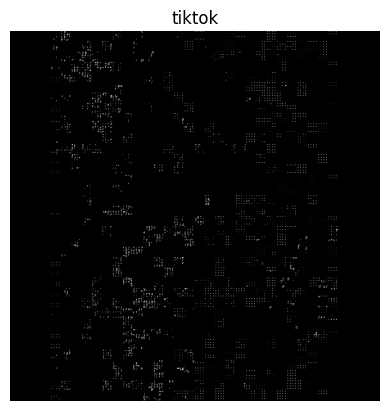

In [12]:
###### Fonction d'affichage ######
def denormalize(img_tensor):
        inverse_normalize = transforms.Normalize(
            mean=[-mean/std, -mean/std, -mean/std],
            std=[1/std, 1/std, 1/std]
        )
        return (inverse_normalize(img_tensor) * 255.).type(torch.uint8).permute(1, 2, 0).numpy()

labels_map = {

    0: "tiktok" ,
    1: "autre",
}

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

img = images[0]
label = labels[0]
print(img.size())

plt.title(labels_map[int(label.numpy())])
plt.axis("off")
plt.imshow(denormalize(img))
plt.show


## Classifier

### Define the Convolutional Neural Network ( Utilisation de ResNet )

In [13]:
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm



In [14]:
net = torchvision.models.resnet18(weights=None)
num_ftrs = net.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
net.fc = nn.Linear(num_ftrs, 2)

In [15]:
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Define a Loss function and optimizer

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20], gamma=.1)

In [17]:
num_class = 2

def quality_measurement(confusion_matrix):
    line_sum=torch.sum(confusion_matrix,dim=1)
    column_sum = torch.sum(confusion_matrix, dim=0)
    total_sum=torch.sum(confusion_matrix)
    Accuracy=torch.sum(torch.diag(confusion_matrix))/total_sum
    Precision=torch.diag(confusion_matrix)/line_sum
    Recall=torch.diag(confusion_matrix)/column_sum
    F1_score = 2 * (Precision * Recall)/(Precision+Recall)
    Pfa=(line_sum - torch.diag(confusion_matrix))/total_sum
    Pmd=(column_sum - torch.diag(confusion_matrix))/total_sum
    print("Accuracy : {}".format(Accuracy.item()))
    print("Precision 0 : {} - Precision 1 : {}".format(Precision[0],Precision[1]))
    print("Recall 0 : {} - Recall 1 : {}".format(Recall[0], Recall[1]))
    print("F1 score 0 : {} - F1 score 1 : {}".format(F1_score[0], F1_score[1]))
    print("Pfa 0 : {} - Pfa 1 : {}".format(Pfa[0], Pfa[1]))
    print("Pmd 0 : {} - Pmd 1 : {}".format(Pmd[0], Pmd[1]))
    return torch.nanmean(Accuracy),torch.nanmean(Precision),torch.nanmean(Recall),torch.nanmean(Recall),torch.nanmean(Pfa),torch.nanmean(Pmd)

def test_accuracy():
  net.eval()
  correct = 0
  total = 0
  confusion_matrix=torch.zeros((num_class,num_class),device=device)
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in test_loader:
          images, labels = data

          images = images.to(device)
          labels = labels.to(device)

          # calculate outputs by running images through the network
          outputs = net(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          for i in range(len(labels)):
                label=int(labels[i])
                confusion_matrix[predicted[i],label]=confusion_matrix[predicted[i],label]+1
  net.train()
  print(quality_measurement(confusion_matrix))
  return  correct / total, confusion_matrix

In [18]:
list_lr = [0.1, 0.01, 0.001, 0.0001]
loss_saveds=[]
accuracy_saveds=[]
test_accuracy_saveds=[]



for lr_v in list_lr :
  net = torchvision.models.resnet18(weights=None)
  num_ftrs = net.fc.in_features
  net.fc = nn.Linear(num_ftrs, 2)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr_v)
  scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20], gamma=.1)
  net = net.to(device)
  loss_saved=[]
  accuracy_saved=[]
  test_accuracy_saved=[]


  for epoch in tqdm(range(50)):  # loop over the dataset multiple times

      running_loss = 0.0
      correct = 0
      total = 0
      for i, data in enumerate(train_loader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)

          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()


      loss_saved.append(running_loss/((i+1)*batch_size))
      accuracy_saved.append(correct / total)
      running_loss = 0.0
      scheduler.step()

      test_accuracy_val, matrice_confusion = test_accuracy()
      test_accuracy_saved.append(test_accuracy_val)

  print('Finished Training')
  print('Loss : ' , loss_saved)
  print('Accuracy : ' , accuracy_saved)
  print('Accuracy : ' , test_accuracy_saved)
  print( 'Matrice de confusion : ' , matrice_confusion)
  loss_saveds.append(loss_saved)
  accuracy_saveds.append(accuracy_saved)
  test_accuracy_saveds.append(test_accuracy_saved)
  PATH = f'./resnet18{lr_v}tiktok.pth'
  torch.save(net.state_dict(), PATH)


  0%|          | 0/50 [00:00<?, ?it/s]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.875 - Recall 1 : 0.125
F1 score 0 : 0.6363636255264282 - F1 score 1 : 0.20000000298023224
Pfa 0 : 0.4375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.4375


  2%|▏         | 1/50 [00:24<20:01, 24.51s/it]

(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


  4%|▍         | 2/50 [00:30<10:45, 13.45s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.875 - Recall 1 : 0.125
F1 score 0 : 0.6363636255264282 - F1 score 1 : 0.20000000298023224
Pfa 0 : 0.4375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.4375
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


  6%|▌         | 3/50 [00:36<08:04, 10.30s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


  8%|▊         | 4/50 [00:42<06:35,  8.61s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 10%|█         | 5/50 [00:48<05:45,  7.67s/it]

Accuracy : 0.75
Precision 0 : 0.75 - Precision 1 : 0.75
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.75 - F1 score 1 : 0.75
Pfa 0 : 0.125 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.125
(tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.1250, device='cuda:0'), tensor(0.1250, device='cuda:0'))


 12%|█▏        | 6/50 [00:56<05:35,  7.63s/it]

Accuracy : 0.6875
Precision 0 : 0.6153846383094788 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.375
F1 score 0 : 0.7619048357009888 - F1 score 1 : 0.5454545617103577
Pfa 0 : 0.3125 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.3125
(tensor(0.6875, device='cuda:0'), tensor(0.8077, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 14%|█▍        | 7/50 [01:02<05:01,  7.01s/it]

Accuracy : 0.6875
Precision 0 : 0.6153846383094788 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.375
F1 score 0 : 0.7619048357009888 - F1 score 1 : 0.5454545617103577
Pfa 0 : 0.3125 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.3125
(tensor(0.6875, device='cuda:0'), tensor(0.8077, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 16%|█▌        | 8/50 [01:10<05:10,  7.39s/it]

Accuracy : 0.75
Precision 0 : 0.699999988079071 - Precision 1 : 0.8333333134651184
Recall 0 : 0.875 - Recall 1 : 0.625
F1 score 0 : 0.7777777910232544 - F1 score 1 : 0.7142857313156128
Pfa 0 : 0.1875 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.1875
(tensor(0.7500, device='cuda:0'), tensor(0.7667, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.1250, device='cuda:0'), tensor(0.1250, device='cuda:0'))


 18%|█▊        | 9/50 [01:16<04:42,  6.89s/it]

Accuracy : 0.6875
Precision 0 : 0.6153846383094788 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.375
F1 score 0 : 0.7619048357009888 - F1 score 1 : 0.5454545617103577
Pfa 0 : 0.3125 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.3125
(tensor(0.6875, device='cuda:0'), tensor(0.8077, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 20%|██        | 10/50 [01:22<04:26,  6.65s/it]

Accuracy : 0.8125
Precision 0 : 0.7272727489471436 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.625
F1 score 0 : 0.8421052694320679 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.1875 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1875
(tensor(0.8125, device='cuda:0'), tensor(0.8636, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.0938, device='cuda:0'), tensor(0.0938, device='cuda:0'))


 22%|██▏       | 11/50 [01:28<04:20,  6.68s/it]

Accuracy : 0.8125
Precision 0 : 0.7272727489471436 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.625
F1 score 0 : 0.8421052694320679 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.1875 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1875
(tensor(0.8125, device='cuda:0'), tensor(0.8636, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.0938, device='cuda:0'), tensor(0.0938, device='cuda:0'))


 24%|██▍       | 12/50 [01:34<04:03,  6.41s/it]

Accuracy : 0.8125
Precision 0 : 0.7272727489471436 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.625
F1 score 0 : 0.8421052694320679 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.1875 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1875
(tensor(0.8125, device='cuda:0'), tensor(0.8636, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.0938, device='cuda:0'), tensor(0.0938, device='cuda:0'))


 26%|██▌       | 13/50 [01:42<04:08,  6.72s/it]

Accuracy : 0.8125
Precision 0 : 0.7272727489471436 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.625
F1 score 0 : 0.8421052694320679 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.1875 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1875
(tensor(0.8125, device='cuda:0'), tensor(0.8636, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.0938, device='cuda:0'), tensor(0.0938, device='cuda:0'))


 28%|██▊       | 14/50 [01:47<03:50,  6.41s/it]

Accuracy : 0.8125
Precision 0 : 0.7272727489471436 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.625
F1 score 0 : 0.8421052694320679 - F1 score 1 : 0.7692307829856873
Pfa 0 : 0.1875 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1875
(tensor(0.8125, device='cuda:0'), tensor(0.8636, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.0938, device='cuda:0'), tensor(0.0938, device='cuda:0'))


 30%|███       | 15/50 [01:54<03:48,  6.52s/it]

Accuracy : 0.875
Precision 0 : 0.800000011920929 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.75
F1 score 0 : 0.888888955116272 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.125 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.125
(tensor(0.8750, device='cuda:0'), tensor(0.9000, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.0625, device='cuda:0'), tensor(0.0625, device='cuda:0'))


 32%|███▏      | 16/50 [02:00<03:36,  6.36s/it]

Accuracy : 0.875
Precision 0 : 0.800000011920929 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.75
F1 score 0 : 0.888888955116272 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.125 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.125
(tensor(0.8750, device='cuda:0'), tensor(0.9000, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.0625, device='cuda:0'), tensor(0.0625, device='cuda:0'))


 34%|███▍      | 17/50 [02:06<03:25,  6.24s/it]

Accuracy : 0.875
Precision 0 : 0.800000011920929 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.75
F1 score 0 : 0.888888955116272 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.125 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.125
(tensor(0.8750, device='cuda:0'), tensor(0.9000, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.0625, device='cuda:0'), tensor(0.0625, device='cuda:0'))


 36%|███▌      | 18/50 [02:13<03:30,  6.58s/it]

Accuracy : 0.875
Precision 0 : 0.800000011920929 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.75
F1 score 0 : 0.888888955116272 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.125 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.125
(tensor(0.8750, device='cuda:0'), tensor(0.9000, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.0625, device='cuda:0'), tensor(0.0625, device='cuda:0'))


 38%|███▊      | 19/50 [02:19<03:16,  6.33s/it]

Accuracy : 0.875
Precision 0 : 0.800000011920929 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.75
F1 score 0 : 0.888888955116272 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.125 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.125
(tensor(0.8750, device='cuda:0'), tensor(0.9000, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.0625, device='cuda:0'), tensor(0.0625, device='cuda:0'))


 40%|████      | 20/50 [02:26<03:14,  6.48s/it]

Accuracy : 0.875
Precision 0 : 0.800000011920929 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.75
F1 score 0 : 0.888888955116272 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.125 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.125
(tensor(0.8750, device='cuda:0'), tensor(0.9000, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.0625, device='cuda:0'), tensor(0.0625, device='cuda:0'))


 42%|████▏     | 21/50 [02:32<03:00,  6.21s/it]

Accuracy : 0.875
Precision 0 : 0.800000011920929 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.75
F1 score 0 : 0.888888955116272 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.125 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.125
(tensor(0.8750, device='cuda:0'), tensor(0.9000, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.0625, device='cuda:0'), tensor(0.0625, device='cuda:0'))


 44%|████▍     | 22/50 [02:38<02:54,  6.23s/it]

Accuracy : 0.875
Precision 0 : 0.800000011920929 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.75
F1 score 0 : 0.888888955116272 - F1 score 1 : 0.8571428656578064
Pfa 0 : 0.125 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.125
(tensor(0.8750, device='cuda:0'), tensor(0.9000, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.0625, device='cuda:0'), tensor(0.0625, device='cuda:0'))


 46%|████▌     | 23/50 [02:45<02:54,  6.46s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 48%|████▊     | 24/50 [02:51<02:42,  6.24s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 50%|█████     | 25/50 [02:58<02:41,  6.47s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 52%|█████▏    | 26/50 [03:03<02:30,  6.28s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 54%|█████▍    | 27/50 [03:09<02:22,  6.20s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 56%|█████▌    | 28/50 [03:16<02:21,  6.42s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 58%|█████▊    | 29/50 [03:24<02:19,  6.64s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 60%|██████    | 30/50 [03:31<02:18,  6.92s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 62%|██████▏   | 31/50 [03:37<02:05,  6.60s/it]

Accuracy : 1.0
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 1.0
F1 score 0 : 1.0 - F1 score 1 : 1.0
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0
(tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0., device='cuda:0'), tensor(0., device='cuda:0'))


 64%|██████▍   | 32/50 [03:44<01:59,  6.64s/it]

Accuracy : 1.0
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 1.0
F1 score 0 : 1.0 - F1 score 1 : 1.0
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0
(tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0., device='cuda:0'), tensor(0., device='cuda:0'))


 66%|██████▌   | 33/50 [03:50<01:49,  6.42s/it]

Accuracy : 1.0
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 1.0
F1 score 0 : 1.0 - F1 score 1 : 1.0
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0
(tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0., device='cuda:0'), tensor(0., device='cuda:0'))


 68%|██████▊   | 34/50 [03:56<01:40,  6.28s/it]

Accuracy : 1.0
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 1.0
F1 score 0 : 1.0 - F1 score 1 : 1.0
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0
(tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0., device='cuda:0'), tensor(0., device='cuda:0'))


 70%|███████   | 35/50 [04:03<01:38,  6.58s/it]

Accuracy : 1.0
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 1.0
F1 score 0 : 1.0 - F1 score 1 : 1.0
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0
(tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0., device='cuda:0'), tensor(0., device='cuda:0'))


 72%|███████▏  | 36/50 [04:09<01:28,  6.33s/it]

Accuracy : 1.0
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 1.0
F1 score 0 : 1.0 - F1 score 1 : 1.0
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0
(tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0., device='cuda:0'), tensor(0., device='cuda:0'))


 74%|███████▍  | 37/50 [04:16<01:24,  6.53s/it]

Accuracy : 1.0
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 1.0
F1 score 0 : 1.0 - F1 score 1 : 1.0
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0
(tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0., device='cuda:0'), tensor(0., device='cuda:0'))


 76%|███████▌  | 38/50 [04:21<01:15,  6.29s/it]

Accuracy : 1.0
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 1.0
F1 score 0 : 1.0 - F1 score 1 : 1.0
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0
(tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0., device='cuda:0'), tensor(0., device='cuda:0'))


 78%|███████▊  | 39/50 [04:28<01:08,  6.26s/it]

Accuracy : 1.0
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 1.0
F1 score 0 : 1.0 - F1 score 1 : 1.0
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0
(tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0., device='cuda:0'), tensor(0., device='cuda:0'))


 80%|████████  | 40/50 [04:35<01:05,  6.51s/it]

Accuracy : 1.0
Precision 0 : 1.0 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 1.0
F1 score 0 : 1.0 - F1 score 1 : 1.0
Pfa 0 : 0.0 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0
(tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0., device='cuda:0'), tensor(0., device='cuda:0'))


 82%|████████▏ | 41/50 [04:40<00:56,  6.25s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 84%|████████▍ | 42/50 [04:47<00:51,  6.44s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 86%|████████▌ | 43/50 [04:53<00:43,  6.21s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 88%|████████▊ | 44/50 [04:59<00:37,  6.17s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 90%|█████████ | 45/50 [05:06<00:32,  6.44s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 92%|█████████▏| 46/50 [05:12<00:24,  6.21s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 94%|█████████▍| 47/50 [05:19<00:19,  6.48s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 96%|█████████▌| 48/50 [05:24<00:12,  6.25s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


 98%|█████████▊| 49/50 [05:30<00:06,  6.18s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))


100%|██████████| 50/50 [05:38<00:00,  6.76s/it]

Accuracy : 0.9375
Precision 0 : 0.8888888955116272 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.875
F1 score 0 : 0.9411765336990356 - F1 score 1 : 0.9333333373069763
Pfa 0 : 0.0625 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.0625
(tensor(0.9375, device='cuda:0'), tensor(0.9444, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.0312, device='cuda:0'), tensor(0.0312, device='cuda:0'))
Finished Training
Loss :  [0.011574660427868366, 0.008386971428990364, 0.006515324814245105, 0.005033246940001845, 0.0038690476212650537, 0.003240307909436524, 0.006672506686300039, 0.0035362867638468742, 0.0020082545815967023, 0.001989064214285463, 0.001166858768556267, 0.001490029157139361, 0.0008925041765905917, 0.0009494972182437778, 0.0008407570712734014, 0.0008208721992559731, 0.0007529033173341304, 0.000763023883337155, 0.00075910086161457, 0.0011394020402804017, 0.0007625540602020919, 0.0006931835960131139, 0.0008489846077281982, 0.0006246073753573, 0.000828


  2%|▏         | 1/50 [00:05<04:38,  5.67s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.875 - Recall 1 : 0.125
F1 score 0 : 0.6363636255264282 - F1 score 1 : 0.20000000298023224
Pfa 0 : 0.4375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.4375
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


  4%|▍         | 2/50 [00:12<05:15,  6.57s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.875 - Recall 1 : 0.125
F1 score 0 : 0.6363636255264282 - F1 score 1 : 0.20000000298023224
Pfa 0 : 0.4375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.4375
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


  6%|▌         | 3/50 [00:18<04:52,  6.23s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.75 - Recall 1 : 0.25
F1 score 0 : 0.6000000238418579 - F1 score 1 : 0.3333333432674408
Pfa 0 : 0.375 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.375
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


  8%|▊         | 4/50 [00:24<04:44,  6.18s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 10%|█         | 5/50 [00:31<04:46,  6.36s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 12%|█▏        | 6/50 [00:37<04:29,  6.14s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 14%|█▍        | 7/50 [00:44<04:41,  6.55s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 16%|█▌        | 8/50 [00:50<04:23,  6.28s/it]

Accuracy : 0.6875
Precision 0 : 0.6666666865348816 - Precision 1 : 0.7142857313156128
Recall 0 : 0.75 - Recall 1 : 0.625
F1 score 0 : 0.7058823108673096 - F1 score 1 : 0.6666666865348816
Pfa 0 : 0.1875 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.1875
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 18%|█▊        | 9/50 [00:56<04:15,  6.23s/it]

Accuracy : 0.75
Precision 0 : 0.75 - Precision 1 : 0.75
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.75 - F1 score 1 : 0.75
Pfa 0 : 0.125 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.125
(tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.1250, device='cuda:0'), tensor(0.1250, device='cuda:0'))


 20%|██        | 10/50 [01:04<04:32,  6.80s/it]

Accuracy : 0.75
Precision 0 : 0.75 - Precision 1 : 0.75
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.75 - F1 score 1 : 0.75
Pfa 0 : 0.125 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.125
(tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.1250, device='cuda:0'), tensor(0.1250, device='cuda:0'))


 22%|██▏       | 11/50 [01:10<04:13,  6.50s/it]

Accuracy : 0.75
Precision 0 : 0.75 - Precision 1 : 0.75
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.75 - F1 score 1 : 0.75
Pfa 0 : 0.125 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.125
(tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.1250, device='cuda:0'), tensor(0.1250, device='cuda:0'))


 24%|██▍       | 12/50 [01:17<04:17,  6.77s/it]

Accuracy : 0.75
Precision 0 : 0.75 - Precision 1 : 0.75
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.75 - F1 score 1 : 0.75
Pfa 0 : 0.125 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.125
(tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.1250, device='cuda:0'), tensor(0.1250, device='cuda:0'))


 26%|██▌       | 13/50 [01:23<03:59,  6.47s/it]

Accuracy : 0.75
Precision 0 : 0.75 - Precision 1 : 0.75
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.75 - F1 score 1 : 0.75
Pfa 0 : 0.125 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.125
(tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.1250, device='cuda:0'), tensor(0.1250, device='cuda:0'))


 28%|██▊       | 14/50 [01:29<03:51,  6.42s/it]

Accuracy : 0.75
Precision 0 : 0.75 - Precision 1 : 0.75
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.75 - F1 score 1 : 0.75
Pfa 0 : 0.125 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.125
(tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.1250, device='cuda:0'), tensor(0.1250, device='cuda:0'))


 30%|███       | 15/50 [01:36<03:43,  6.40s/it]

Accuracy : 0.75
Precision 0 : 0.75 - Precision 1 : 0.75
Recall 0 : 0.75 - Recall 1 : 0.75
F1 score 0 : 0.75 - F1 score 1 : 0.75
Pfa 0 : 0.125 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.125
(tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.7500, device='cuda:0'), tensor(0.1250, device='cuda:0'), tensor(0.1250, device='cuda:0'))


 32%|███▏      | 16/50 [01:42<03:33,  6.27s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 34%|███▍      | 17/50 [01:49<03:39,  6.66s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 36%|███▌      | 18/50 [01:55<03:24,  6.39s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 38%|███▊      | 19/50 [02:02<03:22,  6.52s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 40%|████      | 20/50 [02:08<03:09,  6.31s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 42%|████▏     | 21/50 [02:14<03:02,  6.29s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 44%|████▍     | 22/50 [02:21<03:02,  6.53s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 46%|████▌     | 23/50 [02:27<02:49,  6.29s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 48%|████▊     | 24/50 [02:34<02:49,  6.50s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 50%|█████     | 25/50 [02:39<02:36,  6.27s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 52%|█████▏    | 26/50 [02:45<02:29,  6.22s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 54%|█████▍    | 27/50 [02:53<02:29,  6.49s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 56%|█████▌    | 28/50 [02:58<02:17,  6.24s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 58%|█████▊    | 29/50 [03:05<02:16,  6.48s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 60%|██████    | 30/50 [03:11<02:05,  6.26s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 62%|██████▏   | 31/50 [03:17<01:57,  6.20s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 64%|██████▍   | 32/50 [03:24<01:55,  6.41s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 66%|██████▌   | 33/50 [03:30<01:44,  6.17s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 68%|██████▊   | 34/50 [03:37<01:44,  6.51s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 70%|███████   | 35/50 [03:43<01:34,  6.28s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 72%|███████▏  | 36/50 [03:49<01:27,  6.23s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 74%|███████▍  | 37/50 [03:55<01:22,  6.31s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 76%|███████▌  | 38/50 [04:01<01:13,  6.17s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 78%|███████▊  | 39/50 [04:09<01:11,  6.54s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 80%|████████  | 40/50 [04:14<01:03,  6.31s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 82%|████████▏ | 41/50 [04:22<01:00,  6.75s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 84%|████████▍ | 42/50 [04:29<00:54,  6.85s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 86%|████████▌ | 43/50 [04:35<00:45,  6.50s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 88%|████████▊ | 44/50 [04:42<00:40,  6.72s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 90%|█████████ | 45/50 [04:48<00:32,  6.41s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 92%|█████████▏| 46/50 [04:54<00:25,  6.35s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 94%|█████████▍| 47/50 [05:01<00:19,  6.44s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 96%|█████████▌| 48/50 [05:06<00:12,  6.21s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


 98%|█████████▊| 49/50 [05:14<00:06,  6.62s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))


100%|██████████| 50/50 [05:20<00:00,  6.40s/it]

Accuracy : 0.6875
Precision 0 : 0.7142857313156128 - Precision 1 : 0.6666666865348816
Recall 0 : 0.625 - Recall 1 : 0.75
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.7058823108673096
Pfa 0 : 0.125 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.125
(tensor(0.6875, device='cuda:0'), tensor(0.6905, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.1562, device='cuda:0'), tensor(0.1562, device='cuda:0'))
Finished Training
Loss :  [0.009559737518429756, 0.008148538880050182, 0.007867527892813087, 0.00783978053368628, 0.007749997545033693, 0.007271960843354464, 0.006986956112086773, 0.006843753391876817, 0.006764704594388604, 0.006722387857735157, 0.006456071278080344, 0.006554208695888519, 0.006578427506610751, 0.006693628150969744, 0.006646055961027741, 0.0063807968981564045, 0.006447319872677326, 0.006223086733371019, 0.006472816225141287, 0.006247282028198242, 0.006579763256013393, 0.006314202211797237, 0.00644089188426733, 0.006460115080699325


  2%|▏         | 1/50 [00:06<05:28,  6.70s/it]

Accuracy : 0.375
Precision 0 : 0.4166666567325592 - Precision 1 : 0.25
Recall 0 : 0.625 - Recall 1 : 0.125
F1 score 0 : 0.5 - F1 score 1 : 0.1666666716337204
Pfa 0 : 0.4375 - Pfa 1 : 0.1875
Pmd 0 : 0.1875 - Pmd 1 : 0.4375
(tensor(0.3750, device='cuda:0'), tensor(0.3333, device='cuda:0'), tensor(0.3750, device='cuda:0'), tensor(0.3750, device='cuda:0'), tensor(0.3125, device='cuda:0'), tensor(0.3125, device='cuda:0'))


  4%|▍         | 2/50 [00:12<05:09,  6.45s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


  6%|▌         | 3/50 [00:19<04:56,  6.31s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


  8%|▊         | 4/50 [00:26<05:05,  6.65s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.875 - Recall 1 : 0.125
F1 score 0 : 0.6363636255264282 - F1 score 1 : 0.20000000298023224
Pfa 0 : 0.4375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.4375
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 10%|█         | 5/50 [00:31<04:43,  6.30s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.875 - Recall 1 : 0.125
F1 score 0 : 0.6363636255264282 - F1 score 1 : 0.20000000298023224
Pfa 0 : 0.4375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.4375
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 12%|█▏        | 6/50 [00:38<04:46,  6.52s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.75 - Recall 1 : 0.25
F1 score 0 : 0.6000000238418579 - F1 score 1 : 0.3333333432674408
Pfa 0 : 0.375 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.375
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 14%|█▍        | 7/50 [00:44<04:29,  6.26s/it]

Accuracy : 0.5625
Precision 0 : 0.5454545617103577 - Precision 1 : 0.6000000238418579
Recall 0 : 0.75 - Recall 1 : 0.375
F1 score 0 : 0.6315789818763733 - F1 score 1 : 0.4615384638309479
Pfa 0 : 0.3125 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.3125
(tensor(0.5625, device='cuda:0'), tensor(0.5727, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 16%|█▌        | 8/50 [00:50<04:20,  6.21s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 18%|█▊        | 9/50 [00:57<04:27,  6.52s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 20%|██        | 10/50 [01:03<04:10,  6.27s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 22%|██▏       | 11/50 [01:10<04:13,  6.50s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 24%|██▍       | 12/50 [01:16<03:58,  6.27s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 26%|██▌       | 13/50 [01:22<03:50,  6.22s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 28%|██▊       | 14/50 [01:29<03:51,  6.44s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 30%|███       | 15/50 [01:35<03:37,  6.22s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 32%|███▏      | 16/50 [01:42<03:41,  6.51s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 34%|███▍      | 17/50 [01:48<03:28,  6.30s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 36%|███▌      | 18/50 [01:54<03:19,  6.23s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 38%|███▊      | 19/50 [02:00<03:18,  6.39s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 40%|████      | 20/50 [02:06<03:05,  6.17s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 42%|████▏     | 21/50 [02:14<03:12,  6.64s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 44%|████▍     | 22/50 [02:22<03:14,  6.93s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 46%|████▌     | 23/50 [02:29<03:08,  6.99s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 48%|████▊     | 24/50 [02:34<02:52,  6.62s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 50%|█████     | 25/50 [02:40<02:41,  6.45s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 52%|█████▏    | 26/50 [02:47<02:37,  6.56s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 54%|█████▍    | 27/50 [02:53<02:24,  6.29s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 56%|█████▌    | 28/50 [03:00<02:25,  6.60s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 58%|█████▊    | 29/50 [03:06<02:14,  6.41s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 60%|██████    | 30/50 [03:13<02:09,  6.48s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 62%|██████▏   | 31/50 [03:19<02:03,  6.51s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 64%|██████▍   | 32/50 [03:26<01:57,  6.53s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 66%|██████▌   | 33/50 [03:34<01:56,  6.85s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 68%|██████▊   | 34/50 [03:40<01:46,  6.67s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 70%|███████   | 35/50 [03:47<01:42,  6.84s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 72%|███████▏  | 36/50 [03:53<01:30,  6.50s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 74%|███████▍  | 37/50 [03:59<01:23,  6.41s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 76%|███████▌  | 38/50 [04:06<01:17,  6.47s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 78%|███████▊  | 39/50 [04:11<01:09,  6.27s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 80%|████████  | 40/50 [04:19<01:06,  6.64s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 82%|████████▏ | 41/50 [04:25<00:57,  6.36s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 84%|████████▍ | 42/50 [04:31<00:51,  6.43s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 86%|████████▌ | 43/50 [04:37<00:44,  6.32s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 88%|████████▊ | 44/50 [04:43<00:37,  6.25s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 90%|█████████ | 45/50 [04:51<00:32,  6.55s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 92%|█████████▏| 46/50 [04:56<00:25,  6.31s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 94%|█████████▍| 47/50 [05:03<00:19,  6.51s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 96%|█████████▌| 48/50 [05:09<00:12,  6.26s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


 98%|█████████▊| 49/50 [05:15<00:06,  6.18s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))


100%|██████████| 50/50 [05:22<00:00,  6.45s/it]

Accuracy : 0.625
Precision 0 : 0.6000000238418579 - Precision 1 : 0.6666666865348816
Recall 0 : 0.75 - Recall 1 : 0.5
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.5714285373687744
Pfa 0 : 0.25 - Pfa 1 : 0.125
Pmd 0 : 0.125 - Pmd 1 : 0.25
(tensor(0.6250, device='cuda:0'), tensor(0.6333, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.1875, device='cuda:0'), tensor(0.1875, device='cuda:0'))
Finished Training
Loss :  [0.010053816717118025, 0.009674674831330776, 0.009338371455669403, 0.009204370435327291, 0.00903472863137722, 0.008933974895626307, 0.008870819117873907, 0.008709813002496958, 0.008765633683651686, 0.00852402439340949, 0.008503444958478212, 0.00854900386184454, 0.00855749100446701, 0.008418841287493706, 0.008578706067055464, 0.008413907140493393, 0.008418289013206959, 0.008311569690704346, 0.0083014783449471, 0.008471446111798286, 0.008291591890156269, 0.00837989617139101, 0.00837741419672966, 0.008425940293818712, 0.0083122849


  2%|▏         | 1/50 [00:05<04:49,  5.91s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


  4%|▍         | 2/50 [00:14<06:10,  7.72s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


  6%|▌         | 3/50 [00:21<05:32,  7.07s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


  8%|▊         | 4/50 [00:27<05:06,  6.66s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 10%|█         | 5/50 [00:34<05:12,  6.95s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 12%|█▏        | 6/50 [00:40<04:48,  6.56s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 14%|█▍        | 7/50 [00:47<04:49,  6.74s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 16%|█▌        | 8/50 [00:53<04:30,  6.43s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 18%|█▊        | 9/50 [00:59<04:19,  6.33s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 20%|██        | 10/50 [01:06<04:22,  6.57s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 22%|██▏       | 11/50 [01:12<04:06,  6.32s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : nan
Recall 0 : 1.0 - Recall 1 : 0.0
F1 score 0 : 0.6666666865348816 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.5
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 24%|██▍       | 12/50 [01:19<04:09,  6.56s/it]

Accuracy : 0.4375
Precision 0 : 0.46666666865348816 - Precision 1 : 0.0
Recall 0 : 0.875 - Recall 1 : 0.0
F1 score 0 : 0.6086956262588501 - F1 score 1 : nan
Pfa 0 : 0.5 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.5
(tensor(0.4375, device='cuda:0'), tensor(0.2333, device='cuda:0'), tensor(0.4375, device='cuda:0'), tensor(0.4375, device='cuda:0'), tensor(0.2812, device='cuda:0'), tensor(0.2812, device='cuda:0'))


 26%|██▌       | 13/50 [01:25<03:53,  6.32s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.875 - Recall 1 : 0.125
F1 score 0 : 0.6363636255264282 - F1 score 1 : 0.20000000298023224
Pfa 0 : 0.4375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.4375
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 28%|██▊       | 14/50 [01:31<03:46,  6.29s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.875 - Recall 1 : 0.125
F1 score 0 : 0.6363636255264282 - F1 score 1 : 0.20000000298023224
Pfa 0 : 0.4375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.4375
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 30%|███       | 15/50 [01:38<03:46,  6.46s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.875 - Recall 1 : 0.125
F1 score 0 : 0.6363636255264282 - F1 score 1 : 0.20000000298023224
Pfa 0 : 0.4375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.4375
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 32%|███▏      | 16/50 [01:44<03:33,  6.27s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.875 - Recall 1 : 0.125
F1 score 0 : 0.6363636255264282 - F1 score 1 : 0.20000000298023224
Pfa 0 : 0.4375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.4375
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


 34%|███▍      | 17/50 [01:51<03:39,  6.64s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 36%|███▌      | 18/50 [01:57<03:23,  6.37s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 38%|███▊      | 19/50 [02:03<03:17,  6.37s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 40%|████      | 20/50 [02:10<03:11,  6.39s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 42%|████▏     | 21/50 [02:16<03:02,  6.28s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 44%|████▍     | 22/50 [02:23<03:07,  6.68s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 46%|████▌     | 23/50 [02:29<02:52,  6.39s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 48%|████▊     | 24/50 [02:36<02:51,  6.58s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 50%|█████     | 25/50 [02:42<02:37,  6.31s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 52%|█████▏    | 26/50 [02:48<02:29,  6.24s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 54%|█████▍    | 27/50 [02:55<02:30,  6.54s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 56%|█████▌    | 28/50 [03:01<02:19,  6.33s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 58%|█████▊    | 29/50 [03:08<02:18,  6.57s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 60%|██████    | 30/50 [03:14<02:06,  6.32s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 62%|██████▏   | 31/50 [03:20<01:59,  6.30s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 64%|██████▍   | 32/50 [03:28<02:04,  6.91s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 66%|██████▌   | 33/50 [03:34<01:51,  6.56s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 68%|██████▊   | 34/50 [03:42<01:49,  6.85s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 70%|███████   | 35/50 [03:47<01:38,  6.53s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 72%|███████▏  | 36/50 [03:54<01:30,  6.47s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 74%|███████▍  | 37/50 [04:00<01:23,  6.45s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 76%|███████▌  | 38/50 [04:06<01:15,  6.31s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 78%|███████▊  | 39/50 [04:14<01:13,  6.70s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 80%|████████  | 40/50 [04:20<01:04,  6.42s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 82%|████████▏ | 41/50 [04:27<00:59,  6.63s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 84%|████████▍ | 42/50 [04:32<00:51,  6.38s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 86%|████████▌ | 43/50 [04:39<00:44,  6.32s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 88%|████████▊ | 44/50 [04:46<00:39,  6.58s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 90%|█████████ | 45/50 [04:52<00:31,  6.32s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 92%|█████████▏| 46/50 [04:59<00:26,  6.63s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 94%|█████████▍| 47/50 [05:05<00:19,  6.38s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 96%|█████████▌| 48/50 [05:11<00:12,  6.37s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


 98%|█████████▊| 49/50 [05:18<00:06,  6.44s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))


100%|██████████| 50/50 [05:23<00:00,  6.48s/it]

Accuracy : 0.5625
Precision 0 : 0.5384615659713745 - Precision 1 : 0.6666666865348816
Recall 0 : 0.875 - Recall 1 : 0.25
F1 score 0 : 0.6666666865348816 - F1 score 1 : 0.3636363744735718
Pfa 0 : 0.375 - Pfa 1 : 0.0625
Pmd 0 : 0.0625 - Pmd 1 : 0.375
(tensor(0.5625, device='cuda:0'), tensor(0.6026, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.2188, device='cuda:0'), tensor(0.2188, device='cuda:0'))
Finished Training
Loss :  [0.00986476894468069, 0.009871806018054485, 0.009793518576771021, 0.009829875081777573, 0.009792763274163008, 0.0096967495046556, 0.009867214597761631, 0.009634422603994608, 0.009597762022167444, 0.009571895934641361, 0.009550328832119703, 0.009605354629456997, 0.009547786321491003, 0.009534916840493679, 0.009565094951540232, 0.009514347650110722, 0.00957145867869258, 0.009575183037668467, 0.00951835885643959, 0.009580470155924559, 0.009513722267001867, 0.009573462419211864, 0.009564212057739496, 0.009504277259111404, 0.

### Print de la loss en fonction des epochs

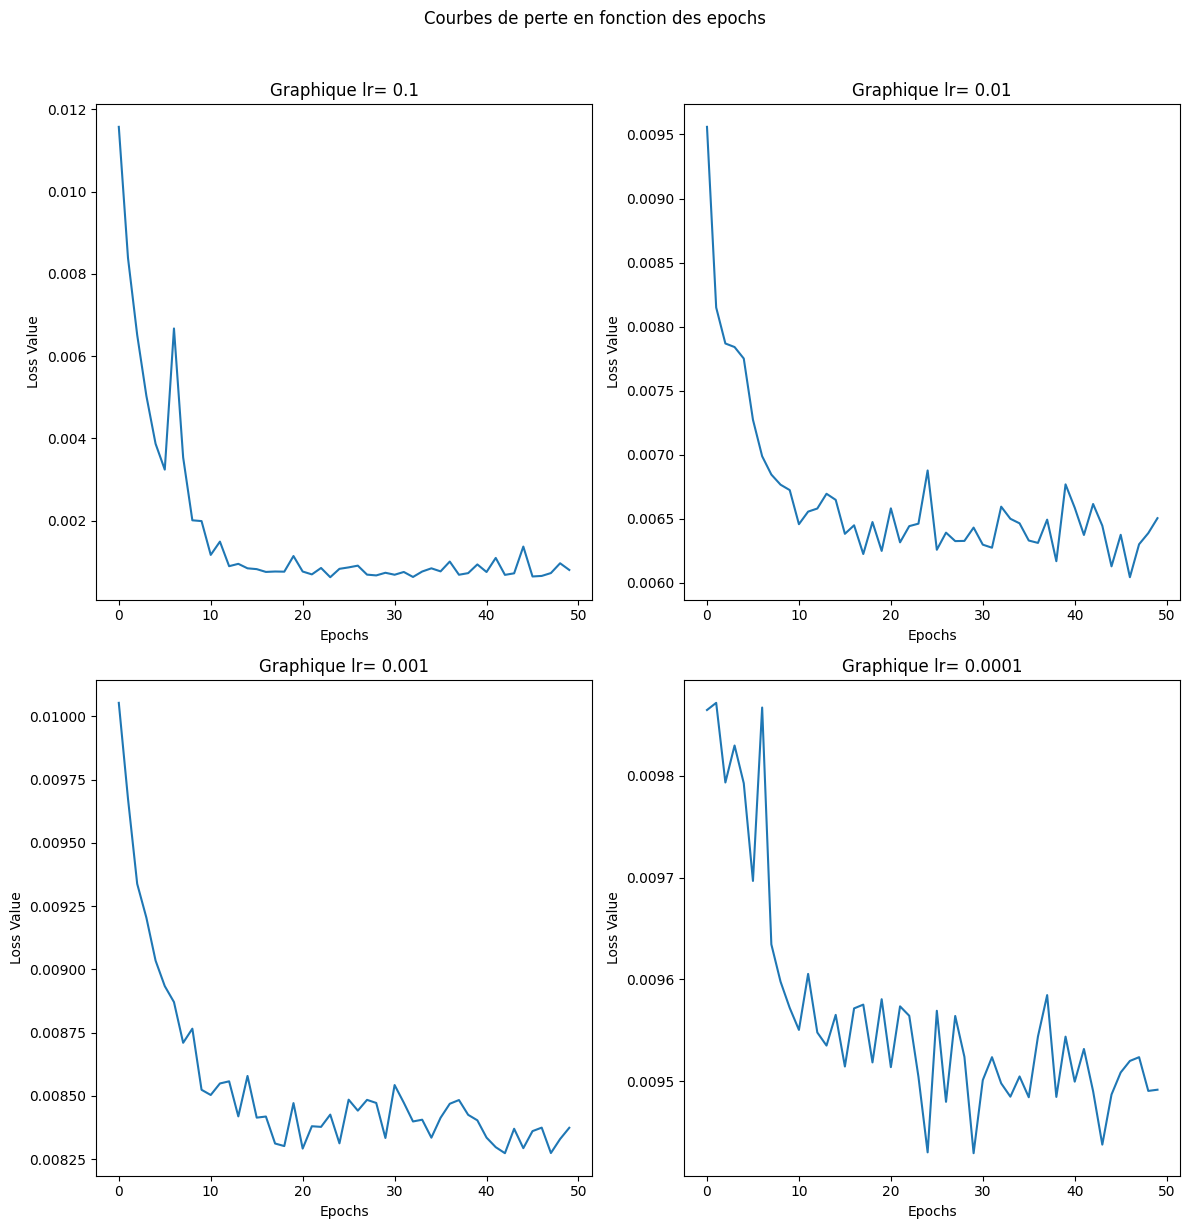

In [19]:
import matplotlib.pyplot as plt

# Création d'une grille pour afficher les graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 6 * 2))
fig.suptitle('Courbes de perte en fonction des epochs', y=1.02)  # Titre global

# Affichage des courbes dans la grille
for i, loss_saved in enumerate(loss_saveds):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.plot(loss_saved)

    # Ajout de titres aux axes pour chaque sous-plot
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss Value')
    ax.set_title(f'Graphique lr= {list_lr[i]}')

# Ajustement de l'espacement entre les sous-plots
plt.tight_layout()

# Affichage de la grille
plt.show()

### Print de l'accuracy en fonction des epochs

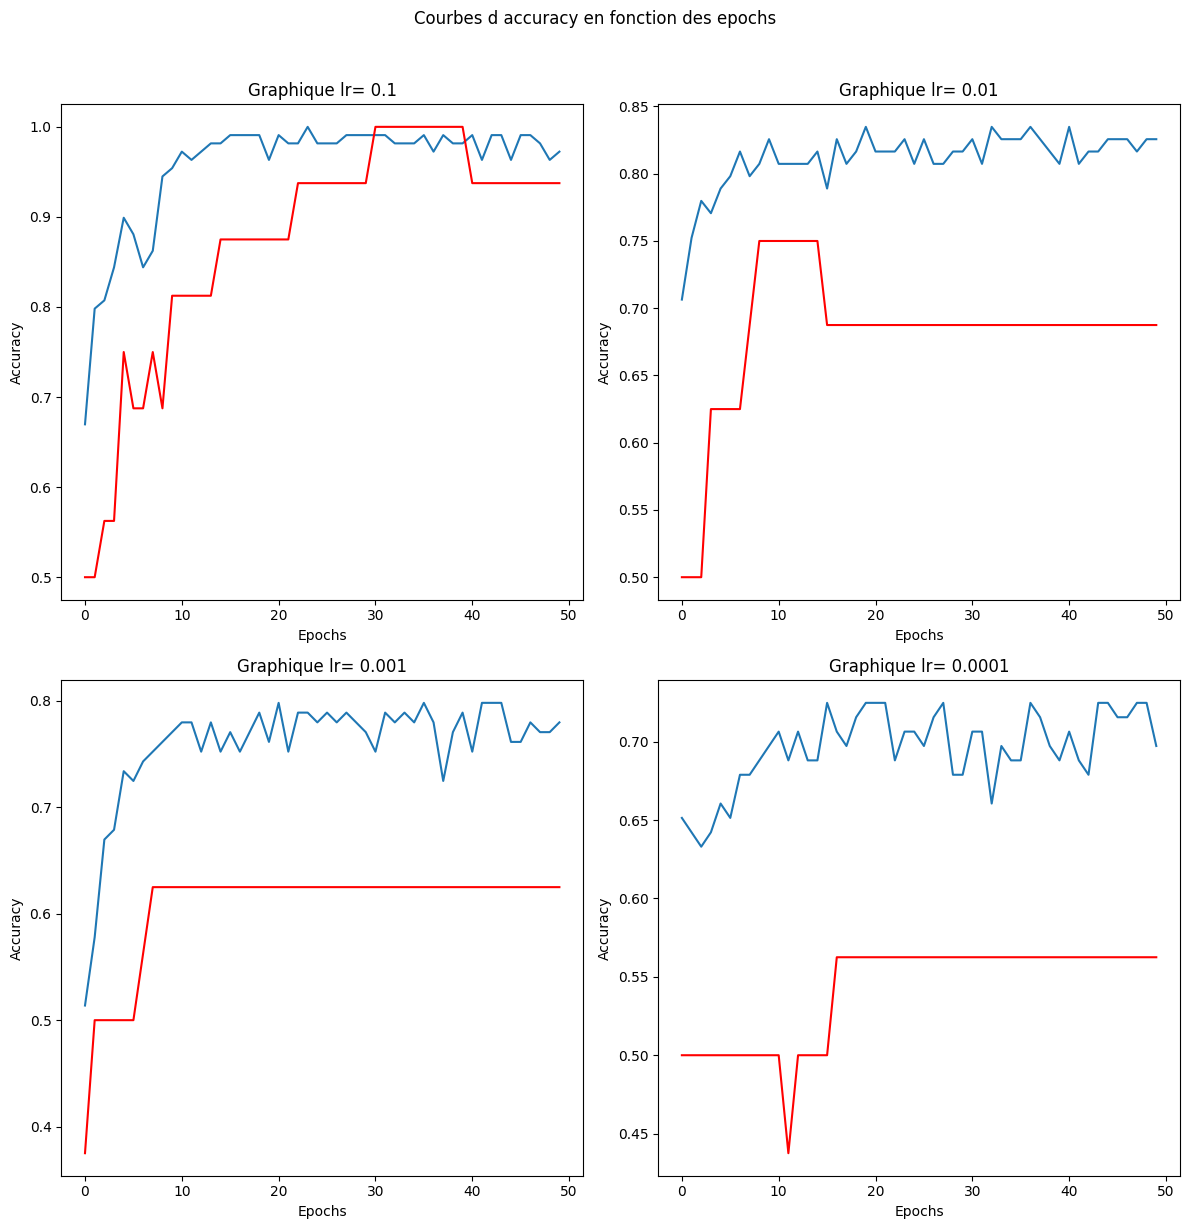

In [20]:
# Création d'une grille pour afficher les graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 6 * 2))
fig.suptitle('Courbes d accuracy en fonction des epochs', y=1.02)  # Titre global

# Affichage des courbes dans la grille
for i, accuracy_saved in enumerate(accuracy_saveds):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.plot(accuracy_saved,label='train')
    ax.plot(test_accuracy_saveds[i],color='r',label='test')

    # Ajout de titres aux axes pour chaque sous-plot
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Graphique lr= {list_lr[i]}')

# Ajustement de l'espacement entre les sous-plots
plt.tight_layout()

# Affichage de la grille
plt.show()

### Test the network on the test data

#### First test on one frame

torch.Size([3, 576, 576])


<function matplotlib.pyplot.show(close=None, block=None)>

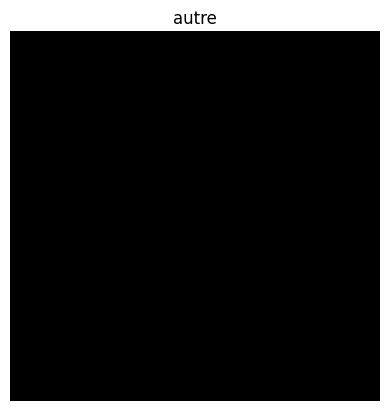

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

images = images.to(device)
labels = labels.to(device)

img = images[0].cpu()  # Copie le tensor sur le CPU
label = labels[0].cpu()  # Copie le tensor sur le CPU

print(img.size())

plt.title(labels_map[int(label.numpy())])
plt.axis("off")
plt.imshow(denormalize(img))
plt.show

In [ ]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

In [ ]:
predicted = predicted.cpu()  # Copie le tensor sur le CPU
print(labels_map[int(predicted[0].numpy())])


vidmizer


#### Let us look at how the network performs on the whole dataset

#### Result by class

In [ ]:
classes = ('tiktok','autre')
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)  # Copie les images sur le GPU
        labels = labels.to(device)  # Copie les étiquettes sur le GPU
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: vidmizer is 20.0 %
Accuracy for class: autre is 78.9 %
